In [65]:
# BM 336546 - HW2
# Part I: Data Exploration


In [66]:
# Loading Data

import pandas as pd 
import numpy as np
from pathlib import Path
import random
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import hinge_loss
from sklearn.decomposition import PCA
%load_ext autoreload


T1D_dataset = pd.read_csv("HW2_data.csv") 
T1D = T1D_dataset[['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger',
                            'Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis',
                            'Muscle Stiffness','Hair Loss','Obesity','Family History']]
Diagnosis = T1D_dataset[['Diagnosis']]

random.seed(10)  # fill your seed number here
T1D_features=T1D.copy()
T1D.sample(n=5, random_state=5)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Family History
197,62,Male,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No,0
330,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,1
261,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
336,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
539,67,Male,No,No,No,No,NaN,No,Yes,NaN,No,No,No,NaN,No,No,0


In [94]:
# replacing nans with samples

i=T1D_features.columns.values

T1Dc_features={}    
for x in i:
    Q = T1D_features[x]
    null_ind=np.where(Q.isnull())[0]
   
    for ii in null_ind:
#         Q.iloc[ii] = Q[np.random.choice(np.where(Q.notnull())[0])]
        Q.iloc[ii] = Q.iloc[np.random.choice(np.where(Q.notnull())[0])]
    T1Dc_features[x] = Q
    

T1Dc_features=pd.DataFrame(T1Dc_features)
T1Dc_features.sample(n=5, random_state=5)


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Family History
197,62,Male,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No,0
330,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,1
261,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
336,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
539,67,Male,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,0


In [68]:
T1Dc_features = pd.get_dummies(data=T1Dc_features, drop_first=True)
T1Dc_features.sample(n=5, random_state=5)


,Age,Family History,Gender_Male,Increased Urination_Yes,Increased Thirst_Yes,Sudden Weight Loss_Yes,Weakness_Yes,Increased Hunger_Yes,Genital Thrush_Yes,Visual Blurring_Yes,Itching_Yes,Irritability_Yes,Delayed Healing_Yes,Partial Paresis_Yes,Muscle Stiffness_Yes,Hair Loss_Yes,Obesity_Yes
197,62,0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
330,40,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
261,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
336,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
539,67,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0


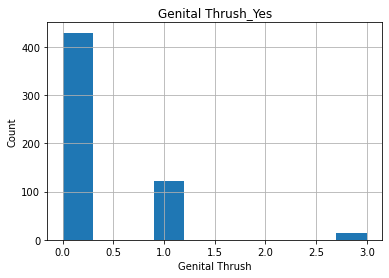

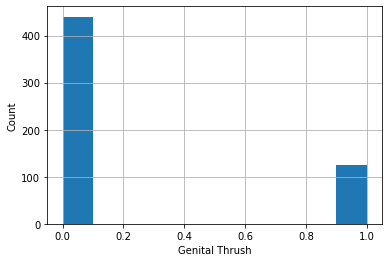

In [69]:
import matplotlib.pyplot as plt


feat = 'Genital Thrush'
Q = pd.DataFrame(T1D[feat])

idx_na = Q.index[Q[feat].isnull()].tolist()
Q = pd.get_dummies(data=Q, drop_first=True)


for i in idx_na:
    Q.loc[i] = 3



Q.hist(bins = 10)

plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()

T1Dc_features['Genital Thrush_Yes'].hist(bins = 10)
plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()

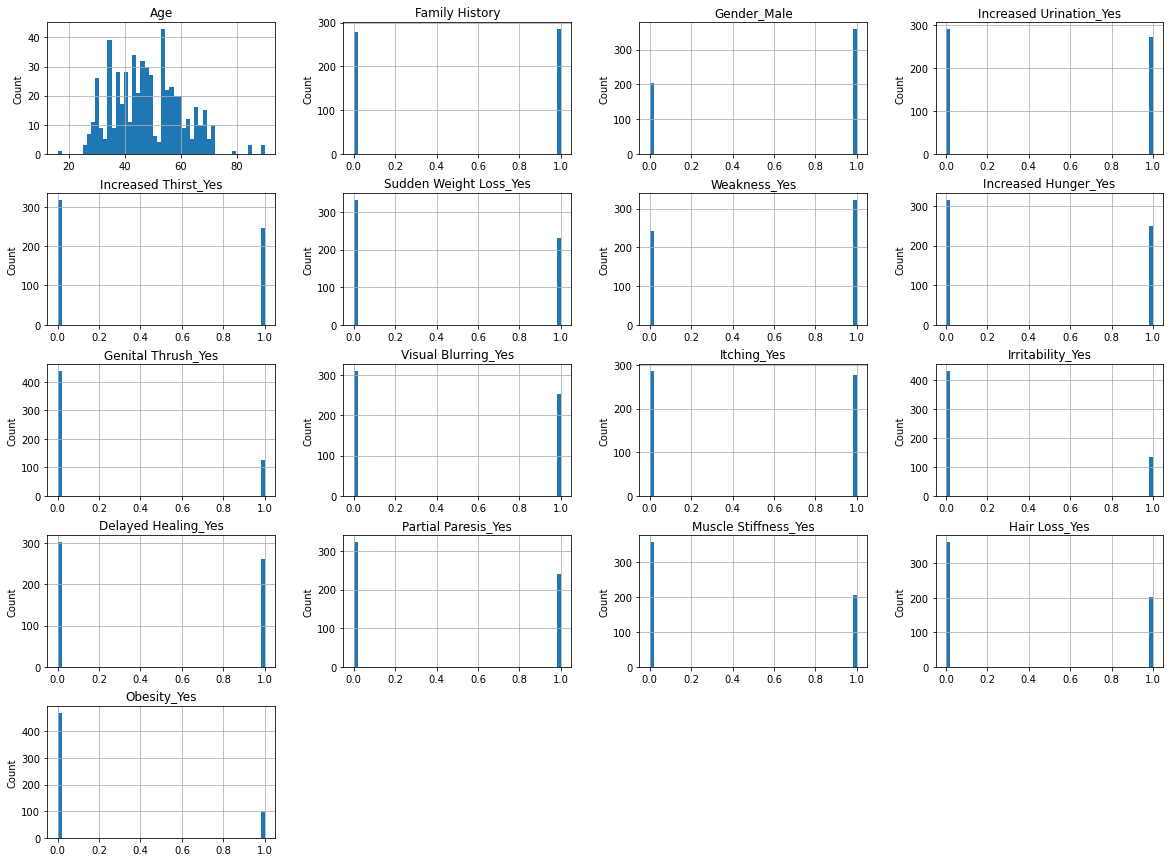

In [70]:
axarr = T1Dc_features.hist(bins=50, figsize=(20, 15)) # histograms of dataframe variables
for idx, ax in enumerate(axarr.flatten()):
#     ax.set_xlabel(i[idx])
    ax.set_ylabel("Count")
plt.show()

In [71]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


orig_feat = T1Dc_features.columns.values
X_train, X_test, y_train, y_test = train_test_split(T1Dc_features, np.ravel(Diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(Diagnosis))

# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))



In [72]:
tbl1=[]

tbl1={'Train %':X_train.iloc[:,1:].sum()*100/len(X_train)}
tbl1['Test %']=X_test.iloc[:,1:].sum()*100/len(X_test)
tbl1['Delta %']=tbl1['Train %']-tbl1['Test %']
print(pd.DataFrame(tbl1))

                           Train %     Test %   Delta %
Family History           50.221239  52.212389 -1.991150
Gender_Male              63.938053  62.831858  1.106195
Increased Urination_Yes  48.230088  48.672566 -0.442478
Increased Thirst_Yes     44.911504  38.938053  5.973451
Sudden Weight Loss_Yes   40.044248  45.132743 -5.088496
Weakness_Yes             56.415929  60.176991 -3.761062
Increased Hunger_Yes     44.469027  42.477876  1.991150
Genital Thrush_Yes       21.017699  26.548673 -5.530973
Visual Blurring_Yes      45.796460  41.592920  4.203540
Itching_Yes              50.000000  46.017699  3.982301
Irritability_Yes         23.008850  25.663717 -2.654867
Delayed Healing_Yes      46.902655  43.362832  3.539823
Partial Paresis_Yes      42.699115  42.477876  0.221239
Muscle Stiffness_Yes     36.504425  36.283186  0.221239
Hair Loss_Yes            34.292035  41.592920 -7.300885
Obesity_Yes              17.477876  14.159292  3.318584


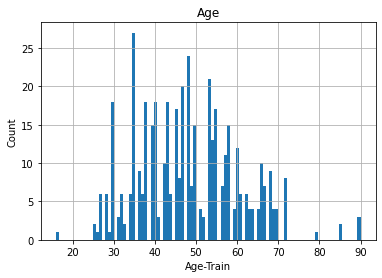

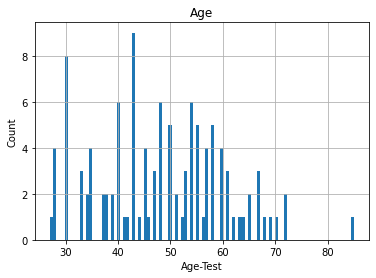

In [73]:
import matplotlib.pyplot as plt


feat = 'Age'
Q=X_train[[feat]]
Q.hist(bins = 100)

plt.xlabel('Age-Train')
plt.ylabel('Count')
plt.show()

q=X_test[['Age']]
q.hist(bins = 100)

plt.xlabel('Age-Test')
plt.ylabel('Count')
plt.show()



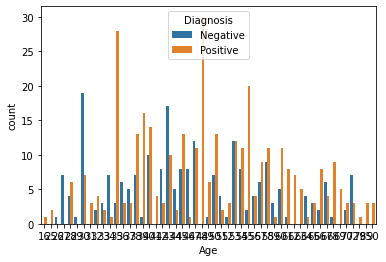

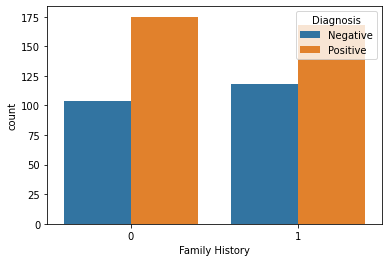

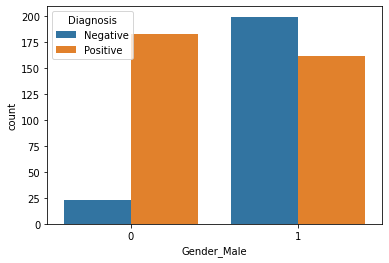

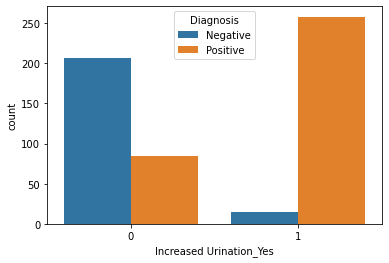

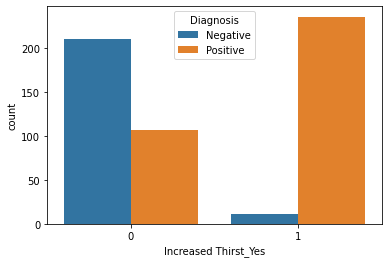

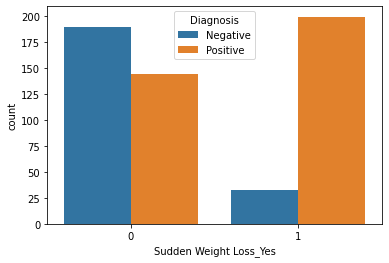

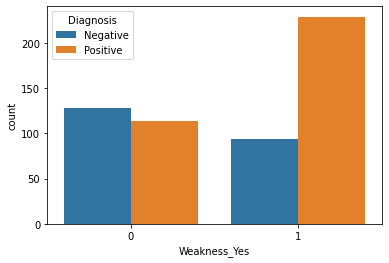

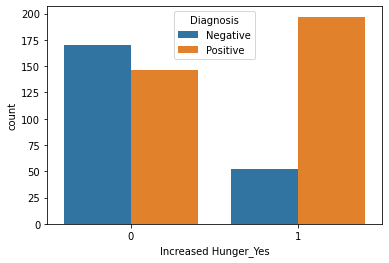

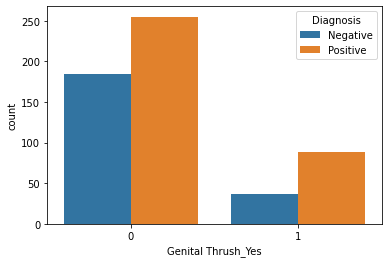

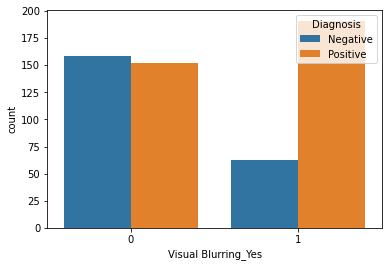

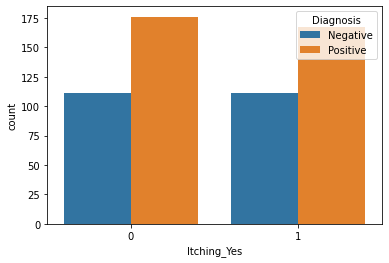

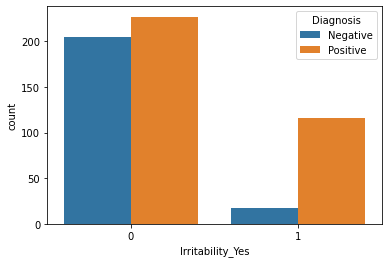

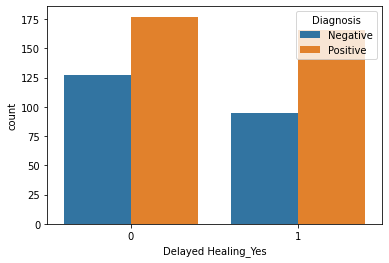

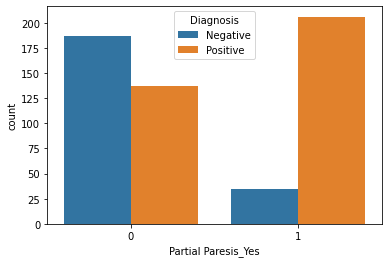

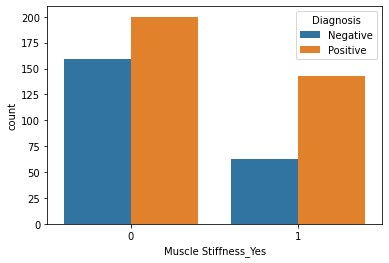

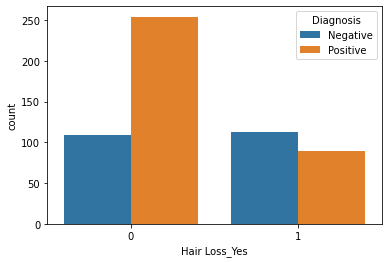

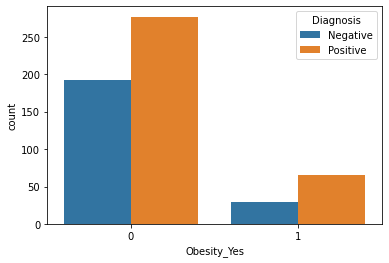

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

data_plotting=T1Dc_features.copy()
data_plotting['Diagnosis']=Diagnosis
features = T1Dc_features.columns.values
for feat in features:
    ax = sns.countplot(x=feat, hue="Diagnosis", data=data_plotting) 
   
    plt.show()
    

<AxesSubplot:>

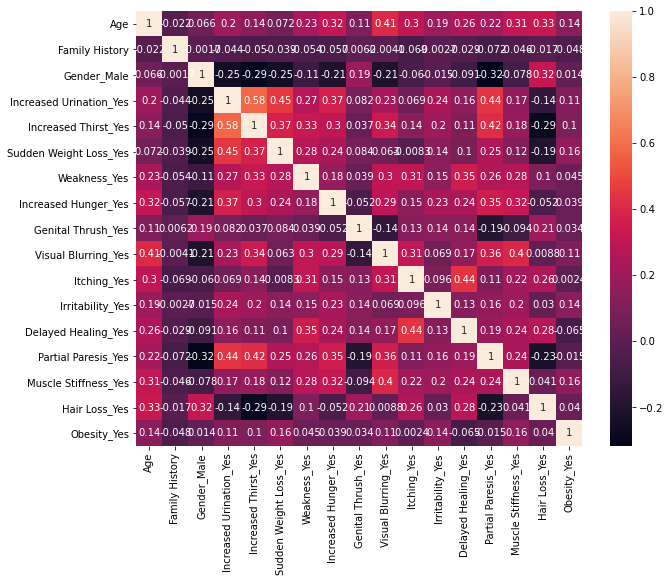

In [75]:
plt.figure(figsize = (10,8))
sns.heatmap(T1Dc_features.corr(), annot = True)

In [76]:
hot_vector=data_plotting.copy()
hot_vector['Diagnosis']=pd.get_dummies(data=hot_vector['Diagnosis'],drop_first=True)
del hot_vector['Age']
print(hot_vector)

     Family History  Gender_Male  Increased Urination_Yes  \
0                 0            1                        0   
1                 0            1                        0   
2                 0            1                        1   
3                 1            0                        0   
4                 0            0                        1   
..              ...          ...                      ...   
560               0            1                        1   
561               0            1                        0   
562               1            0                        1   
563               0            1                        0   
564               0            1                        0   

     Increased Thirst_Yes  Sudden Weight Loss_Yes  Weakness_Yes  \
0                       0                       0             1   
1                       0                       0             0   
2                       1                       0             1   

In [77]:
def plot_radar(clf, clf_type):
    labels=np.array(['Accuracy', 'F1', 'PPV', 'Sensitivity', 'AUROC']) 
    score_mat_train = np.stack((clf.cv_results_['mean_train_accuracy'], clf.cv_results_['mean_train_f1'],
                               clf.cv_results_['mean_train_precision'], clf.cv_results_['mean_train_recall'],
                               clf.cv_results_['mean_train_roc_auc']), axis=0)
    score_mat_val = np.stack((clf.cv_results_['mean_test_accuracy'], clf.cv_results_['mean_test_f1'],
                               clf.cv_results_['mean_test_precision'], clf.cv_results_['mean_test_recall'],
                               clf.cv_results_['mean_test_roc_auc']), axis=0)


    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    angles=np.concatenate((angles,[angles[0]]))
    cv_dict = clf.cv_results_['params']
    fig=plt.figure(figsize=(18,14))
    if 'svm__gamma' in cv_dict[0]:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0] and item["svm__gamma"] == clf_type[1]]
    else:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0]]
    for idx, val in enumerate(new_list):
        ax = fig.add_subplot(1, len(new_list), 1+idx, polar=True)
        rel_idx, rel_dict = val
        stats_train = score_mat_train[:, rel_idx]
        stats_train=np.concatenate((stats_train,[stats_train[0]]))
        ax.plot(angles, stats_train, 'o-', linewidth=2)
        ax.fill(angles, stats_train, alpha=0.25)
        stats_val = score_mat_val[:, rel_idx]
        stats_val=np.concatenate((stats_val,[stats_val[0]]))
        ax.plot(angles, stats_val, 'o-', linewidth=2)
        ax.fill(angles, stats_val, alpha=0.25)
        ax.set_thetagrids(angles[0:-1] * 180/np.pi, labels)
        if idx == 0:
            ax.set_ylabel(clf_type[0], fontsize=18)
        ax.set_title('C = %.3f' % (rel_dict['svm__C']))
        if 'svm__gamma' in cv_dict[0]:
            ax.set_xlabel('$\gamma = %s $' % (rel_dict['svm__gamma']))
        ax.set_ylim([0,1])
        ax.legend(['Train','Validation'])
        ax.grid(True)
        
    plt.show()

In [78]:
#Linear section 5-1

from sklearn.model_selection import StratifiedKFold
y_train = pd.get_dummies(data=y_train, drop_first=True)
y_test = pd.get_dummies(data=y_test, drop_first=True)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)


svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},cv=skf,
                       scoring=['accuracy','f1','precision','recall','roc_auc'], 
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.881, test=0.824) f1: (train=0.906, test=0.864) precision: (train=0.867, test=0.810) recall: (train=0.950, test=0.927) roc_auc: (train=0.954, test=0.914) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.825, test=0.868) f1: (train=0.870, test=0.900) precision: (train=0.795, test=0.831) recall: (train=0.959, test=0.982) roc_auc: (train=0.954, test=0.979) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.870, test=0.811) f1: (train=0.899, test=0.852) precision: (train=0.853, test=0.803) recall: (train=0.950, test=0.907) roc_auc: (train=0.957, test=0.928) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.818, test=0.822) f1: (train=0.865, test=0.869) precision: (train=0.782, test=0.791) recall: (train=0.968, test=0.964) roc_auc: (train=0.955, test=0.963) total t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             param_grid={'svm__C': array([1.e-03, 1.e-02, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'svm__kernel': ['linear']},
             refit='roc_auc', return_train_score=True,
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=3)

In [79]:
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

{'svm__C': 10.0, 'svm__kernel': 'linear'}


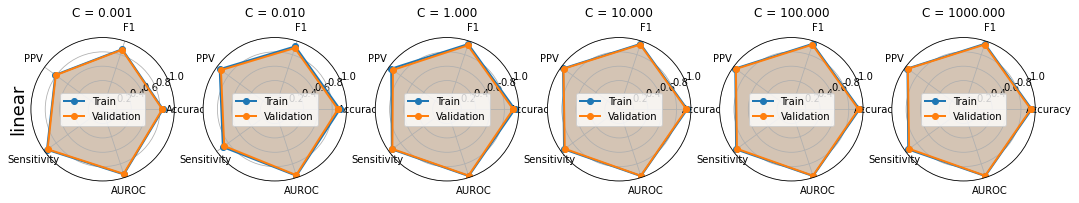

In [80]:
clf_type = ['linear']
plot_radar(svm_lin,clf_type)

In [81]:
from sklearn.metrics import confusion_matrix
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

Sensitivity is 0.94
Specificity is 0.86
PPV is 0.92
NPV is 0.90
Accuracy is 0.91
F1 is 0.93
LOSS is 0.18
AUROC is 0.963


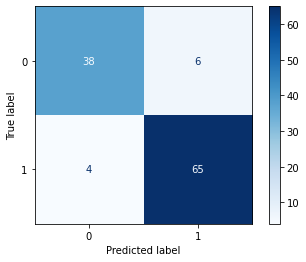

In [82]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score

y_pred_test = best_svm_lin.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = best_svm_lin.predict_proba(X_test)
#--------------------------Impelment your code here:-------------------------------------
y_pred_test_sc=np.where(y_pred_test==0, -1, y_pred_test)
y_test_sc=np.where(y_test==0, -1, y_test)

TN = calc_TN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
LOSS=hinge_loss(y_test_sc,y_pred_test_sc)
print(f'Sensitivity is {Se:.2f}')
print(f'Specificity is {Sp:.2f}')
print(f'PPV is {PPV:.2f}')
print(f'NPV is {NPV:.2f}')
print(f'Accuracy is {Acc:.2f}')
print(f'F1 is {F1:.2f}')
print(f'LOSS is {LOSS:.2f}')
plot_confusion_matrix(svm_lin, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

In [83]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg=LogisticRegression(random_state=10)
log_reg.fit(X_train_scaled, np.ravel(y_train))

LogisticRegression(random_state=10)

In [84]:
from sklearn.metrics import confusion_matrix
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

Sensitivity is 0.96
Specificity is 0.84
PPV is 0.90
NPV is 0.93
Accuracy is 0.91
F1 is 0.93
LOSS is 3.06
AUROC is 0.965


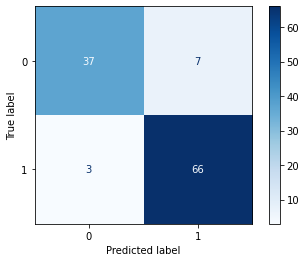

In [85]:
y_pred_test = log_reg.predict(X_test_scaled) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = log_reg.predict_proba(X_test_scaled)
#--------------------------Impelment your code here:-------------------------------------
TN = calc_TN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
LOSS=log_loss(y_test,y_pred_test)
print(f'Sensitivity is {Se:.2f}')
print(f'Specificity is {Sp:.2f}')
print(f'PPV is {PPV:.2f}')
print(f'NPV is {NPV:.2f}')
print(f'Accuracy is {Acc:.2f}')
print(f'F1 is {F1:.2f}')
print(f'LOSS is {LOSS:.2f}')
plot_confusion_matrix(log_reg, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.grid(False)
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

In [86]:
C = np.array([1, 100, 1000])#, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                                                      'svm__gamma': ['auto', 'scale']},
                       scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.992, test=0.967) f1: (train=0.993, test=0.972) precision: (train=0.991, test=0.981) recall: (train=0.995, test=0.964) roc_auc: (train=0.999, test=0.993) total time=   0.0s
[CV 2/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.989, test=0.945) f1: (train=0.991, test=0.954) precision: (train=0.991, test=0.963) recall: (train=0.991, test=0.945) roc_auc: (train=0.999, test=0.994) total time=   0.0s
[CV 3/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.986, test=0.933) f1: (train=0.989, test=0.943) precision: (train=0.986, test=0.962) recall: (train=0.991, test=0.926) roc_auc: (train=0.999, test=0.990) total time=   0.0s
[CV 4/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.986, test=0.967) f1: (train=0.989, test=0.972) precision: (train=0.982, test=0.981) recall: (train=0.995, test=0.964) r

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             param_grid={'svm__C': array([   1,  100, 1000]),
                         'svm__gamma': ['auto', 'scale'],
                         'svm__kernel': ['rbf', 'poly']},
             refit='roc_auc', return_train_score=True,
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=3)

In [87]:
#Choose the best estimator and name it as best_svm_nonlin.
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

{'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


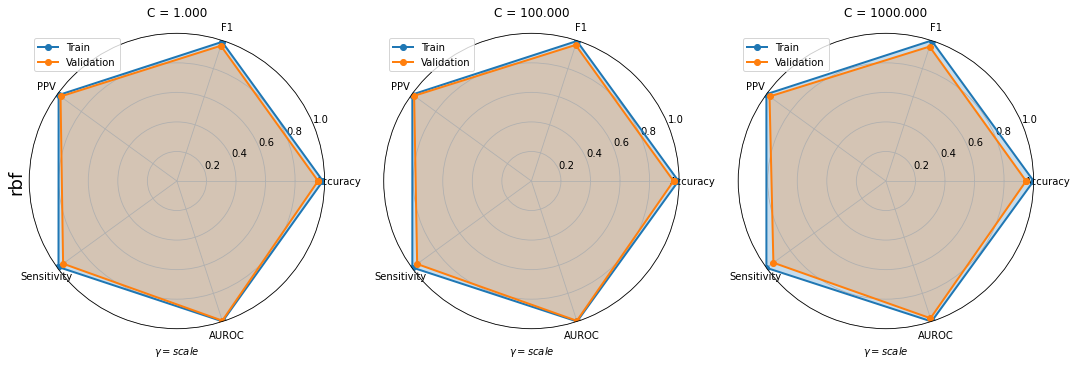

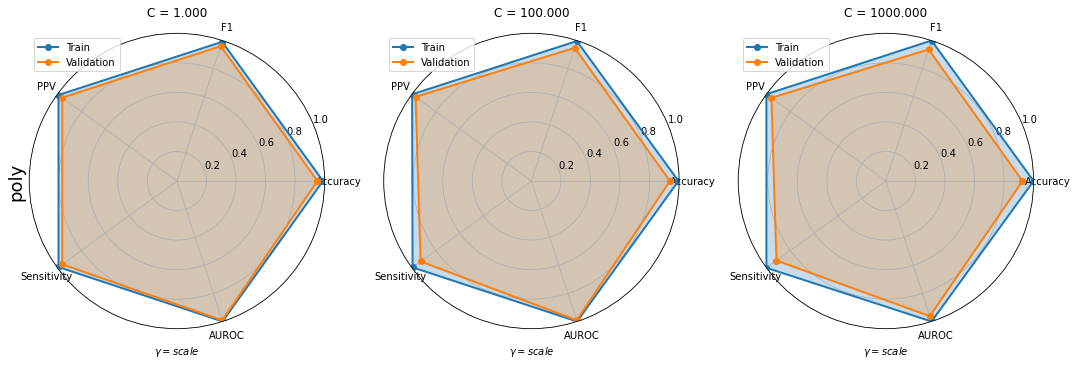

In [88]:
clf_type = ['rbf', 'scale']
plot_radar(svm_nonlin, clf_type)
clf_type = ['poly', 'scale']
plot_radar(svm_nonlin, clf_type)

Sensitivity is 0.96
Specificity is 0.93
PPV is 0.96
NPV is 0.93
Accuracy is 0.95
F1 is 0.96
LOSS is 0.11
AUROC is 0.979


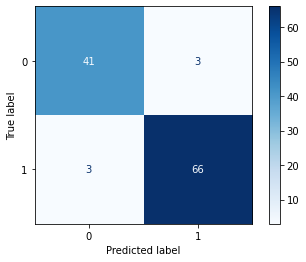

In [89]:
y_pred_test = best_svm_nonlin.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = best_svm_nonlin.predict_proba(X_test)
#--------------------------Impelment your code here:-------------------------------------
y_pred_test_sc=np.where(y_pred_test==0, -1, y_pred_test)
y_test_sc=np.where(y_test==0, -1, y_test)

TN = calc_TN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
LOSS=hinge_loss(y_test_sc,y_pred_test_sc)
print(f'Sensitivity is {Se:.2f}')
print(f'Specificity is {Sp:.2f}')
print(f'PPV is {PPV:.2f}')
print(f'NPV is {NPV:.2f}')
print(f'Accuracy is {Acc:.2f}')
print(f'F1 is {F1:.2f}')
print(f'LOSS is {LOSS:.2f}')
plot_confusion_matrix(svm_nonlin, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Sensitivity is 0.93
Specificity is 0.93
PPV is 0.96
NPV is 0.89
Accuracy is 0.93
F1 is 0.94
AUROC is 0.976


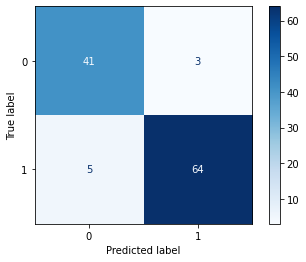

In [96]:
#random forest
from sklearn.metrics import plot_confusion_matrix, roc_auc_score,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc = Pipeline(steps=[('scale', StandardScaler()), ('rfc', RandomForestClassifier(max_depth=4, random_state=0, criterion='gini'))])
rfc.fit(X_train, np.ravel(y_train))
# importance = rfc.feature_importances_
y_pred_test = rfc.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = rfc.predict_proba(X_test)
#--------------------------Impelment your code here:-------------------------------------
TN = calc_TN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print(f'Sensitivity is {Se:.2f}')
print(f'Specificity is {Sp:.2f}')
print(f'PPV is {PPV:.2f}')
print(f'NPV is {NPV:.2f}')
print(f'Accuracy is {Acc:.2f}')
print(f'F1 is {F1:.2f}')
plot_confusion_matrix(rfc,X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

# print(importance)

In [99]:
#scaling
scale=StandardScaler()
# del X_train['Age']
# del X_test['Age']

X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)
# X_train_scaled=np.where(X_train==0, -1, X_train)
# X_test_scaled=np.where(X_test==0, -1, X_test)
n_components = 2
#---------------------------Implement your code here:------------------------
pca=PCA(n_components,whiten=True)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)
#----------------------------------------------------------------------------

In [100]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

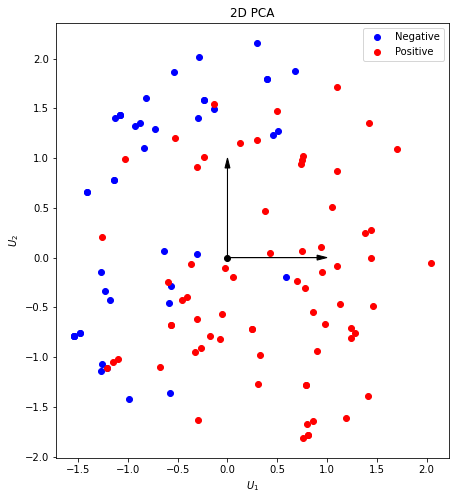

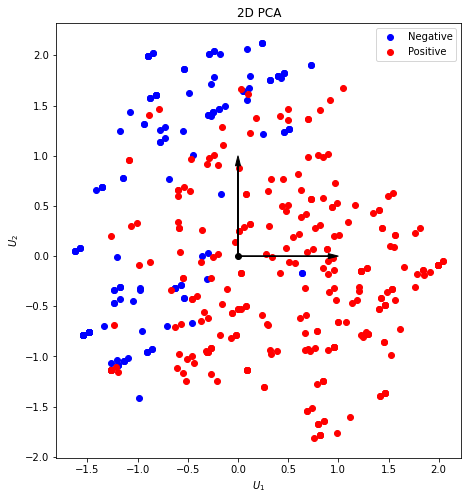

In [101]:
plt_2d_pca(X_test_pca,np.ravel(y_test))
plt_2d_pca(X_train_pca,np.ravel(y_train))
